# June 20 - Rewriting the ConvaeNet

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

## Goal 1 : Find a convolutional operator to go from size `( batch_size x 16 x 2 x 8 )` to `( batch_size x 256 x 1 x 1 )` and its corresponding deconvolutional operator

## Methods for determining the sizes from the convolutional and deconvolutional layers

In [2]:
# Method to print the output shape given the layer parameters and input size

def print_conv_output(input_size, output_channels, kernel_size, stride,
                       padding, dilation):
    
    print("Input size : num_channels {0}, height {1}, width {2}".format(input_size[0],
                                                                        input_size[1],
                                                                        input_size[2]))
    
    output_height = (input_size[1] + 2*padding[0] - 
                               dilation[0]*(kernel_size[0] - 1) - 1)/stride[0] + 1
    
    output_width = (input_size[2] + 2*padding[1] - 
                               dilation[1]*(kernel_size[1] - 1) - 1)/stride[1] + 1
    
    
    print("Actual output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    output_height = math.floor(output_height)
    output_width = math.floor(output_width)
    
    print("Floor Output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    return (output_channels, output_height, output_width)

# Method to print the output shape given the layer parameters and input size

def print_conv_trans_output(input_size, output_channels, kernel_size, stride,
                       padding, out_padding, dilation):
    
    print("Input size : num_channels {0}, height {1}, width {2}".format(input_size[0],
                                                                        input_size[1],
                                                                        input_size[2]))
    
    output_height = (input_size[1]-1)*stride[0] - 2*padding[0] + dilation[0]*(kernel_size[0] - 1) + out_padding[0] + 1
    
    output_width = (input_size[2]-1)*stride[1] - 2*padding[1] + dilation[1]*(kernel_size[1] - 1) + out_padding[1] + 1
    
    
    print("Output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    return (output_channels, output_height, output_width)

## Find the size of the kernel to achieve Goal 1 

### Encoder (Convolution)

In [5]:
# Downsampled size at en_conv6
tensor_curr_size = (16, 2, 8)

# Applying a convolution
tensor_curr_size = print_conv_output(input_size=tensor_curr_size,
                                         output_channels=16,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(1,1),
                                         dilation=(1,1))

Input size : num_channels 16, height 2, width 8
Actual output size : num_channels 16, height 2.0, width 8.0
Floor Output size : num_channels 16, height 2, width 8


### Decoder (Deconvolution)

In [8]:
# Applying a convolution
tensor_curr_size = print_conv_trans_output(input_size=tensor_curr_size,
                                         output_channels=256,
                                         kernel_size=(2,8),
                                         stride=(1,1),
                                         padding=(0,0),
                                         out_padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 256, height 1, width 1
Output size : num_channels 256, height 2, width 8


## Size of the kernel is 2 x 8

## Test using the classifier

## Plot the diagnostics of the ConvNet classifier with the previous flattening procedure

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


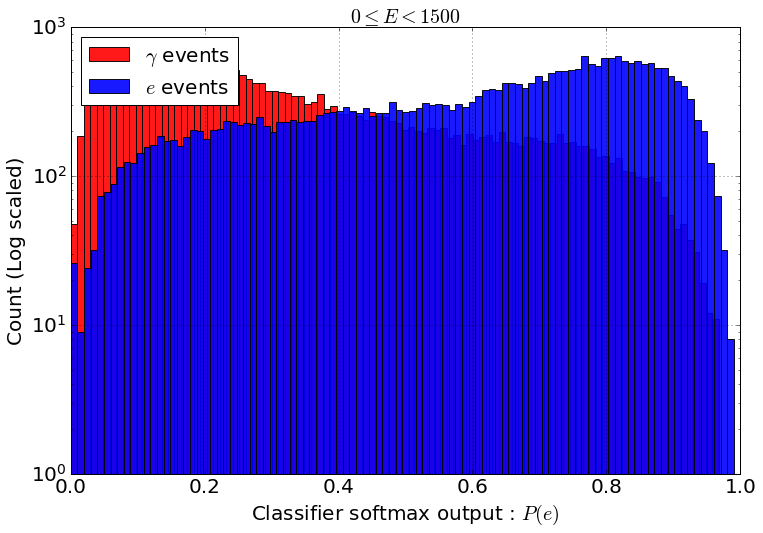

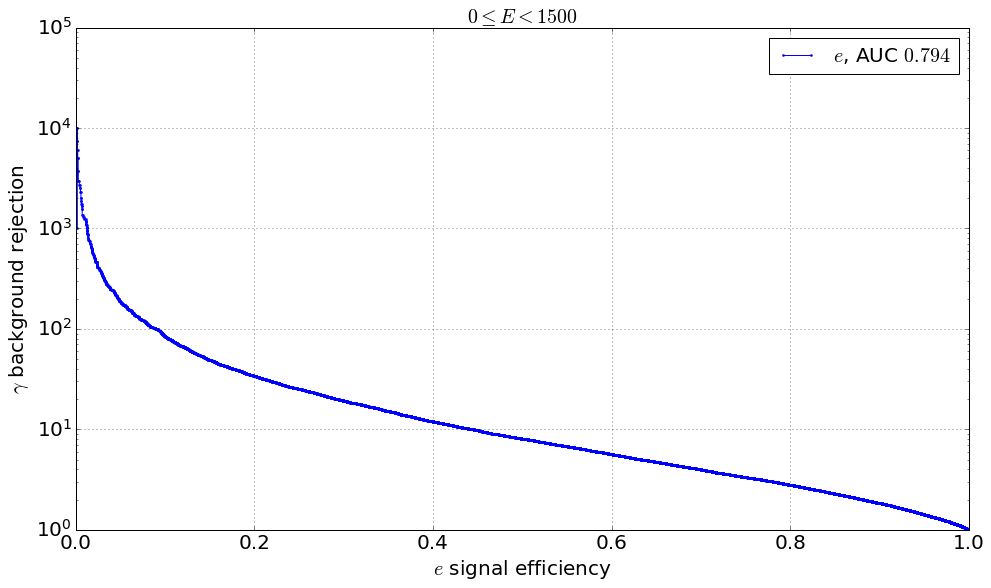

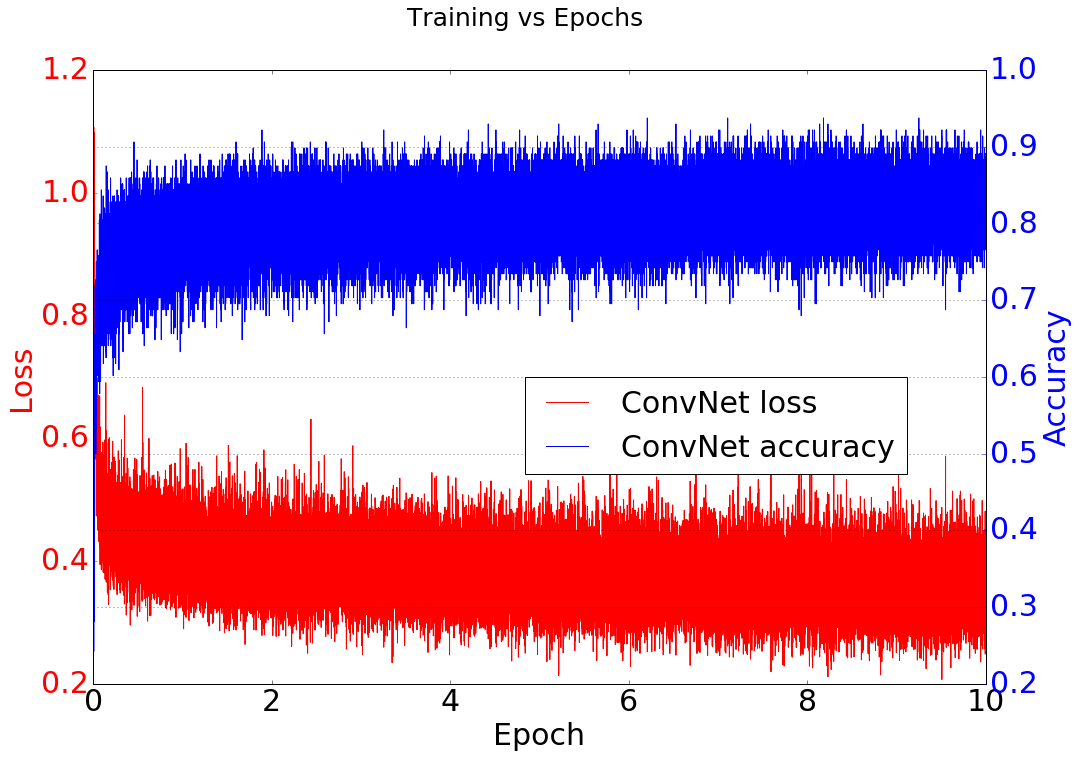

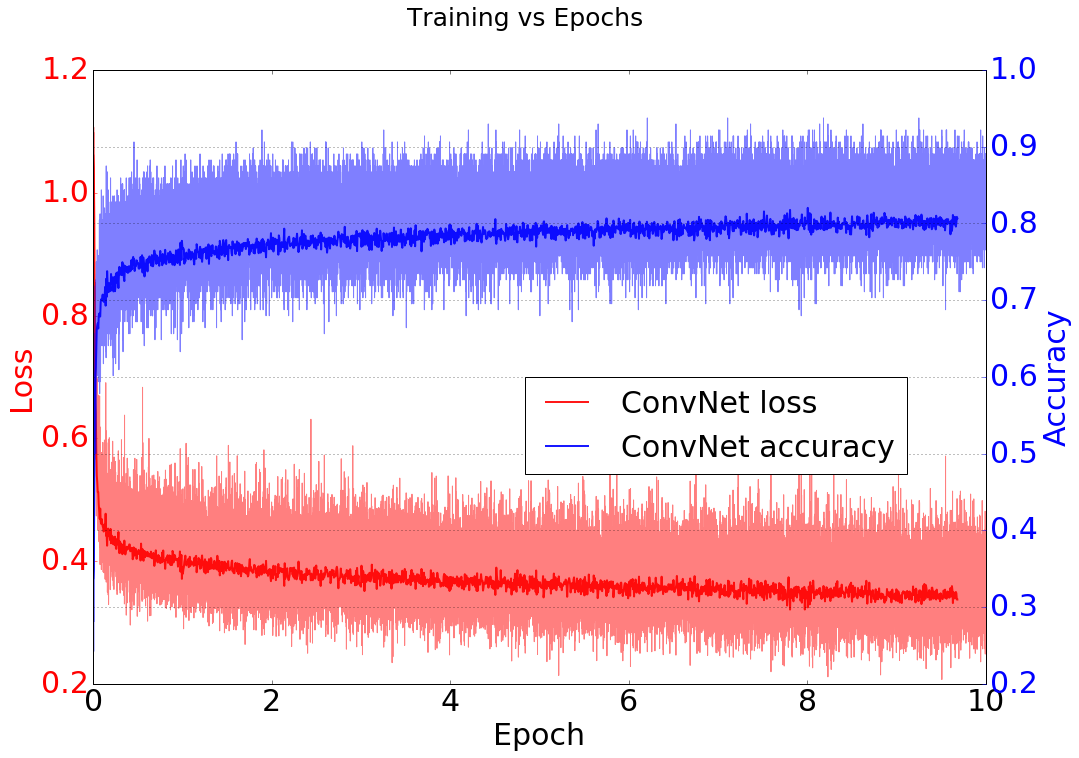

In [10]:
# Using the absolute path
run_id = "20190620_165428"
model_name = "ConvNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"e":1}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

## Plot the diagnostics of the ConvNet classifier with the new flattening procedure

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


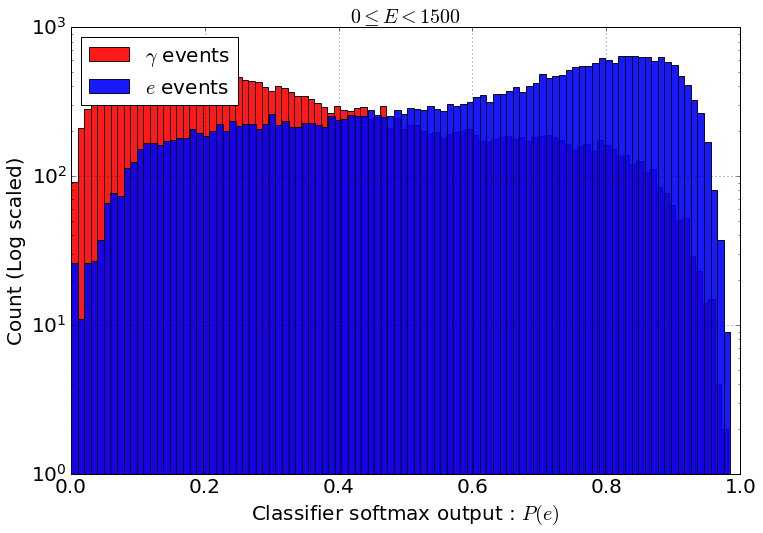

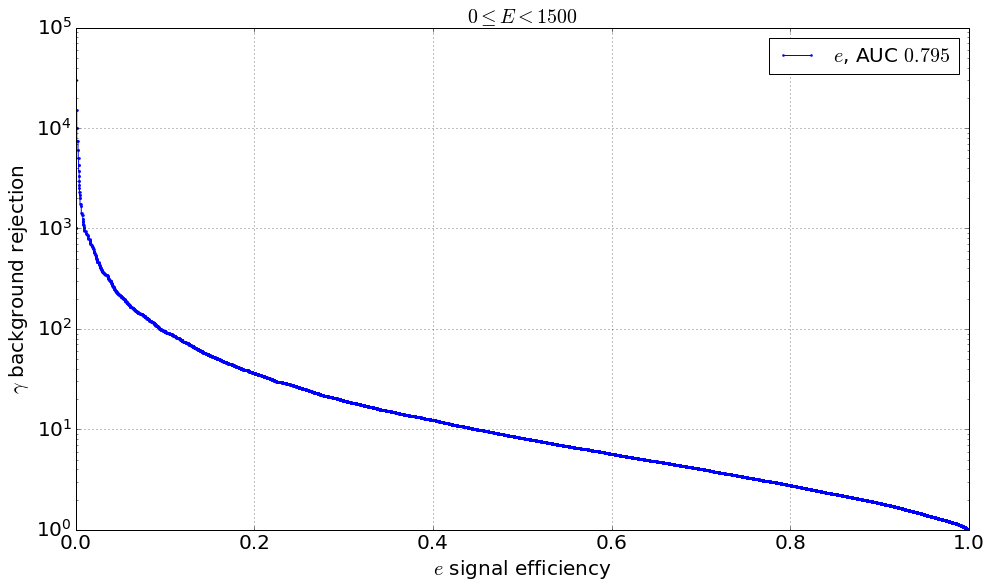

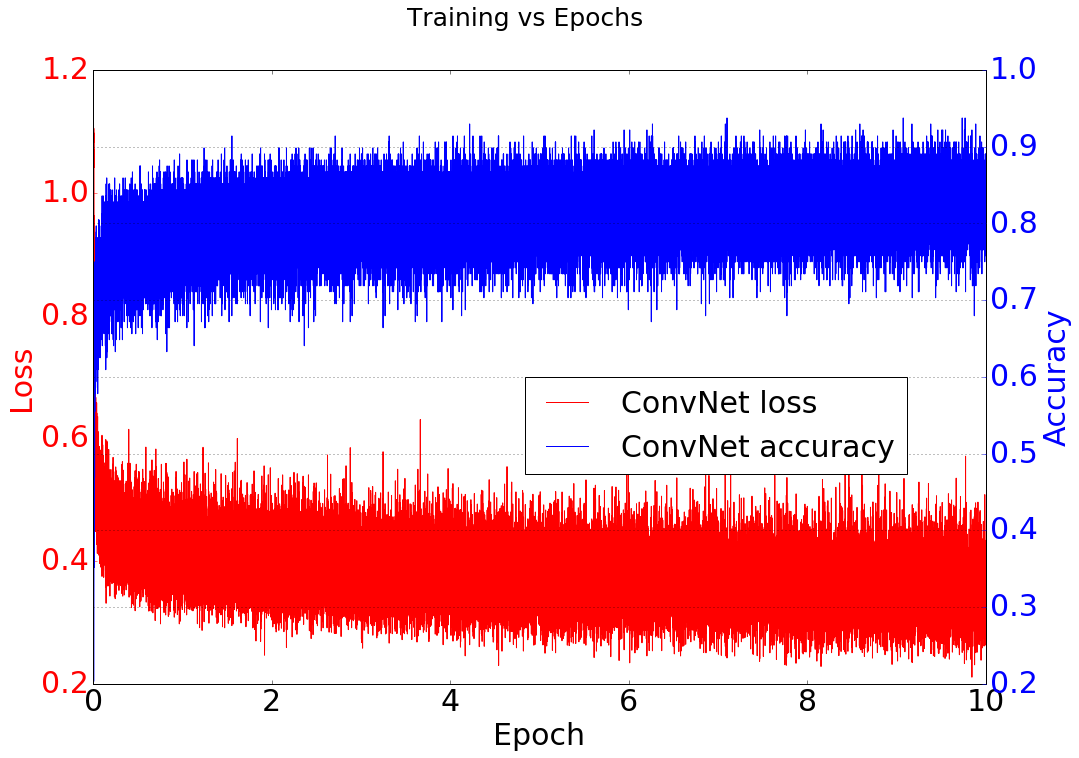

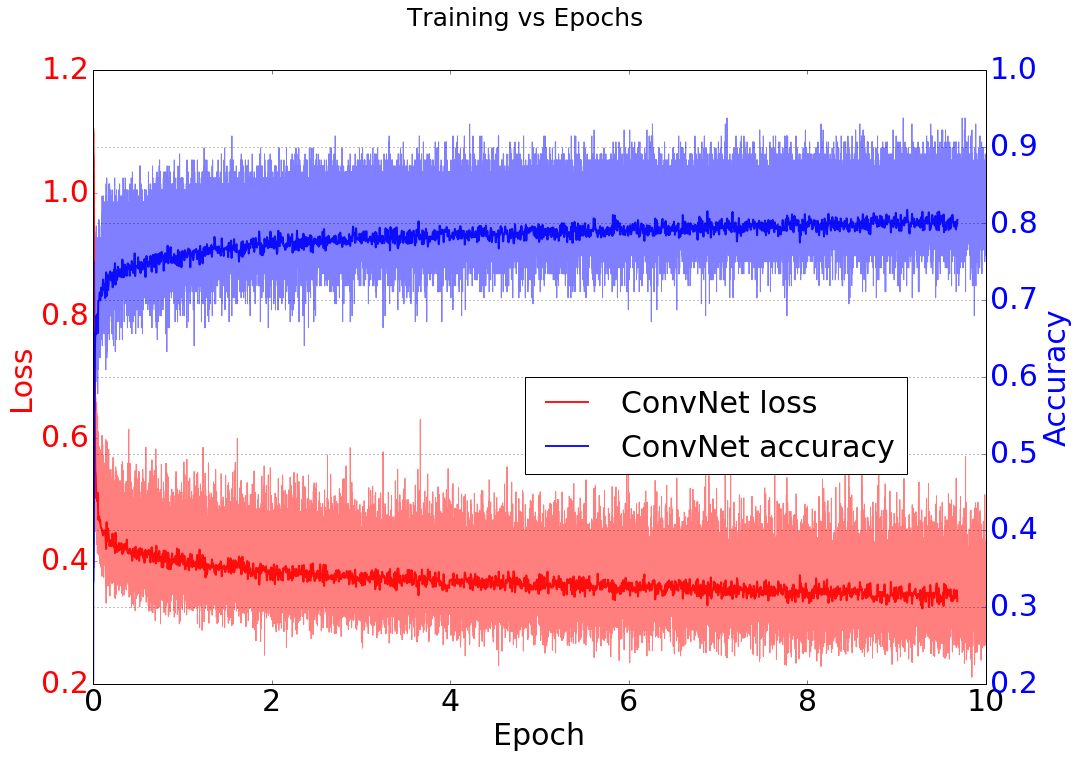

In [11]:
# Using the absolute path
run_id = "20190620_174539"
model_name = "ConvNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"e":1}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)